In [1]:
from plotting import Plotting
from data_gen import FrankeDataGen, TerrainDataGen

import matplotlib.pyplot as plt
import json

import warnings
warnings.filterwarnings('ignore')

### Plotting source data

In [2]:
data_points = 41
data_points_terrain = 100

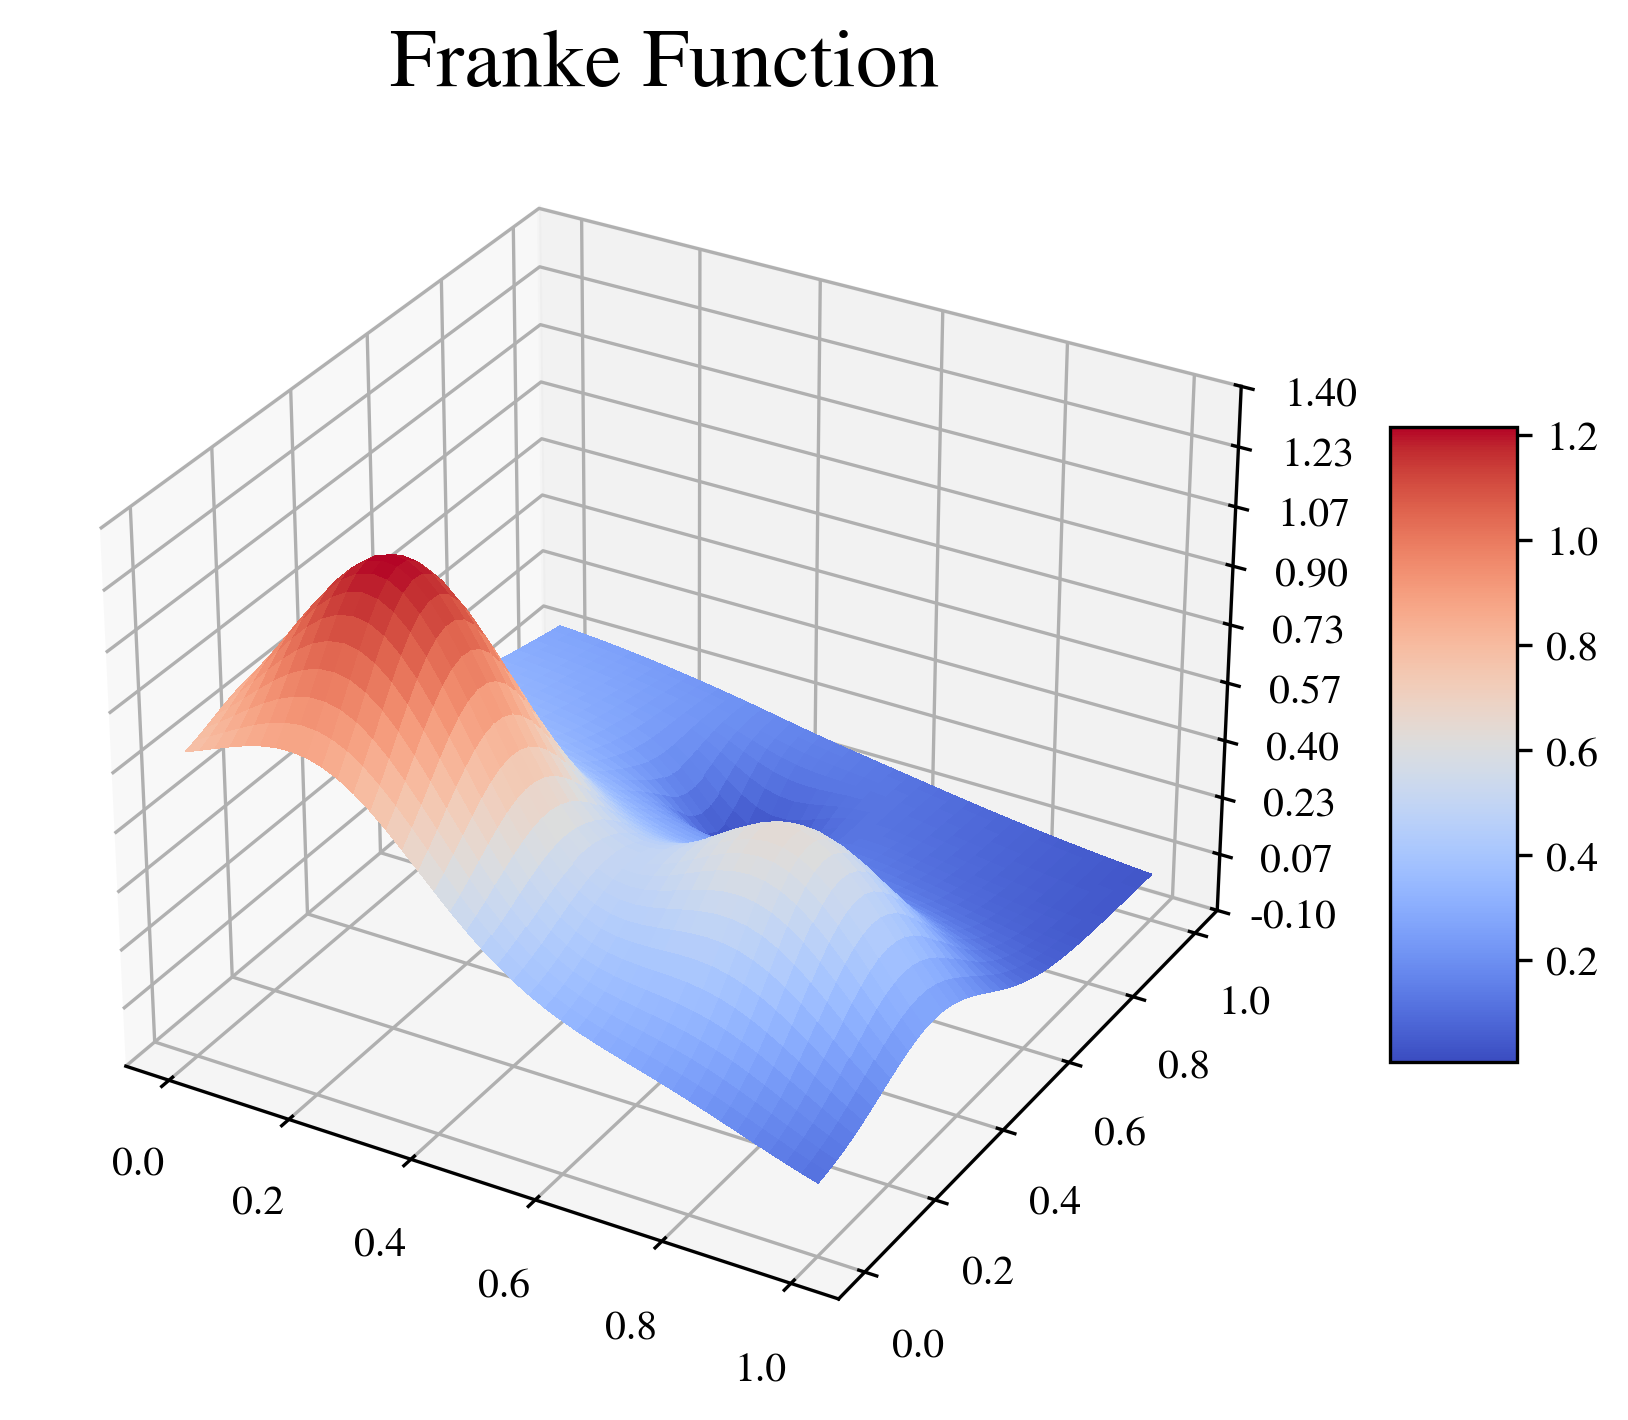

In [3]:
data = FrankeDataGen(data_points = data_points)
data.plot_data(save_path="../figures/figures_in_report/franke_func.pdf")

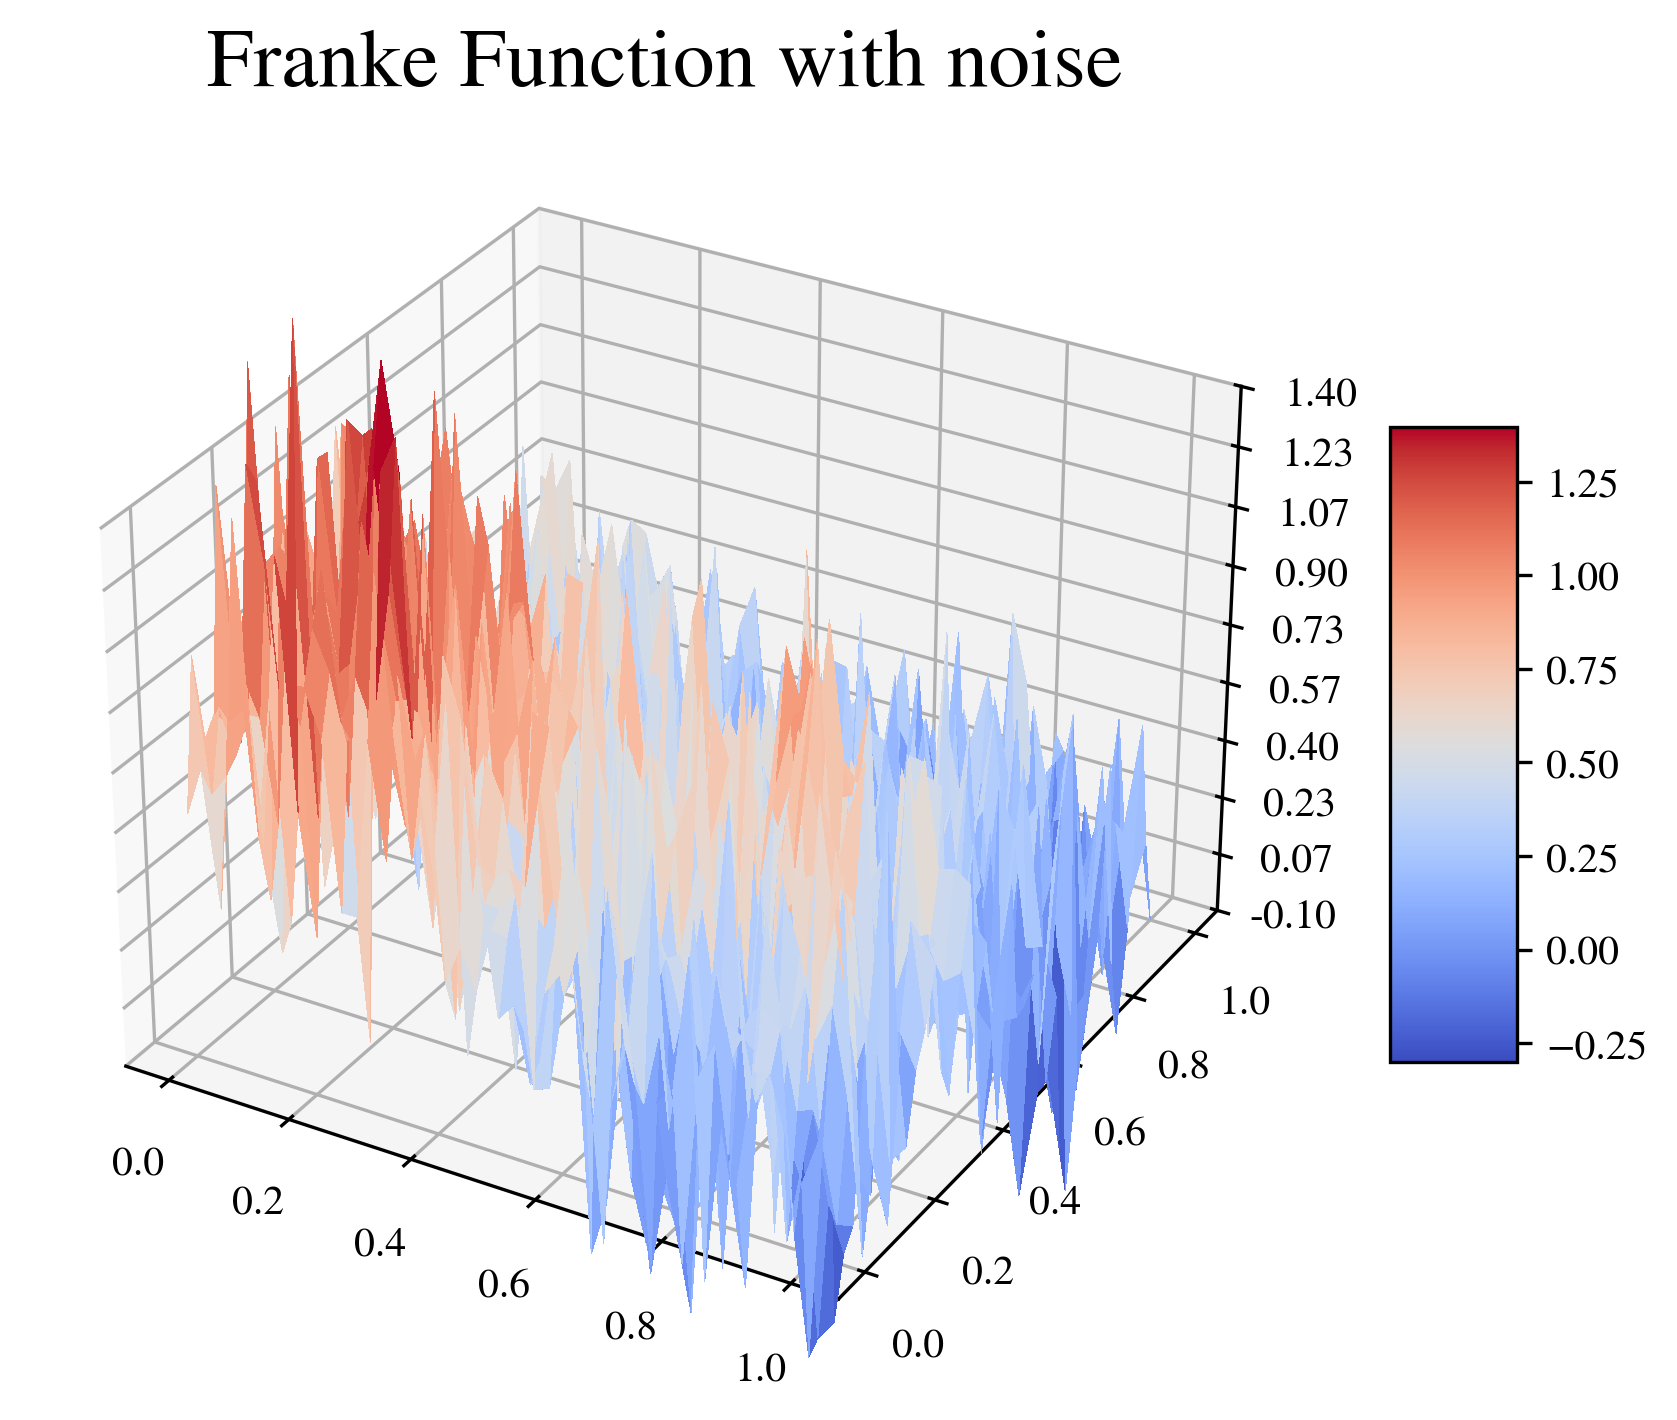

In [4]:
data = FrankeDataGen(data_points = data_points, noise=True)
data.plot_data(save_path="../figures/figures_in_report/franke_func_noise.pdf")

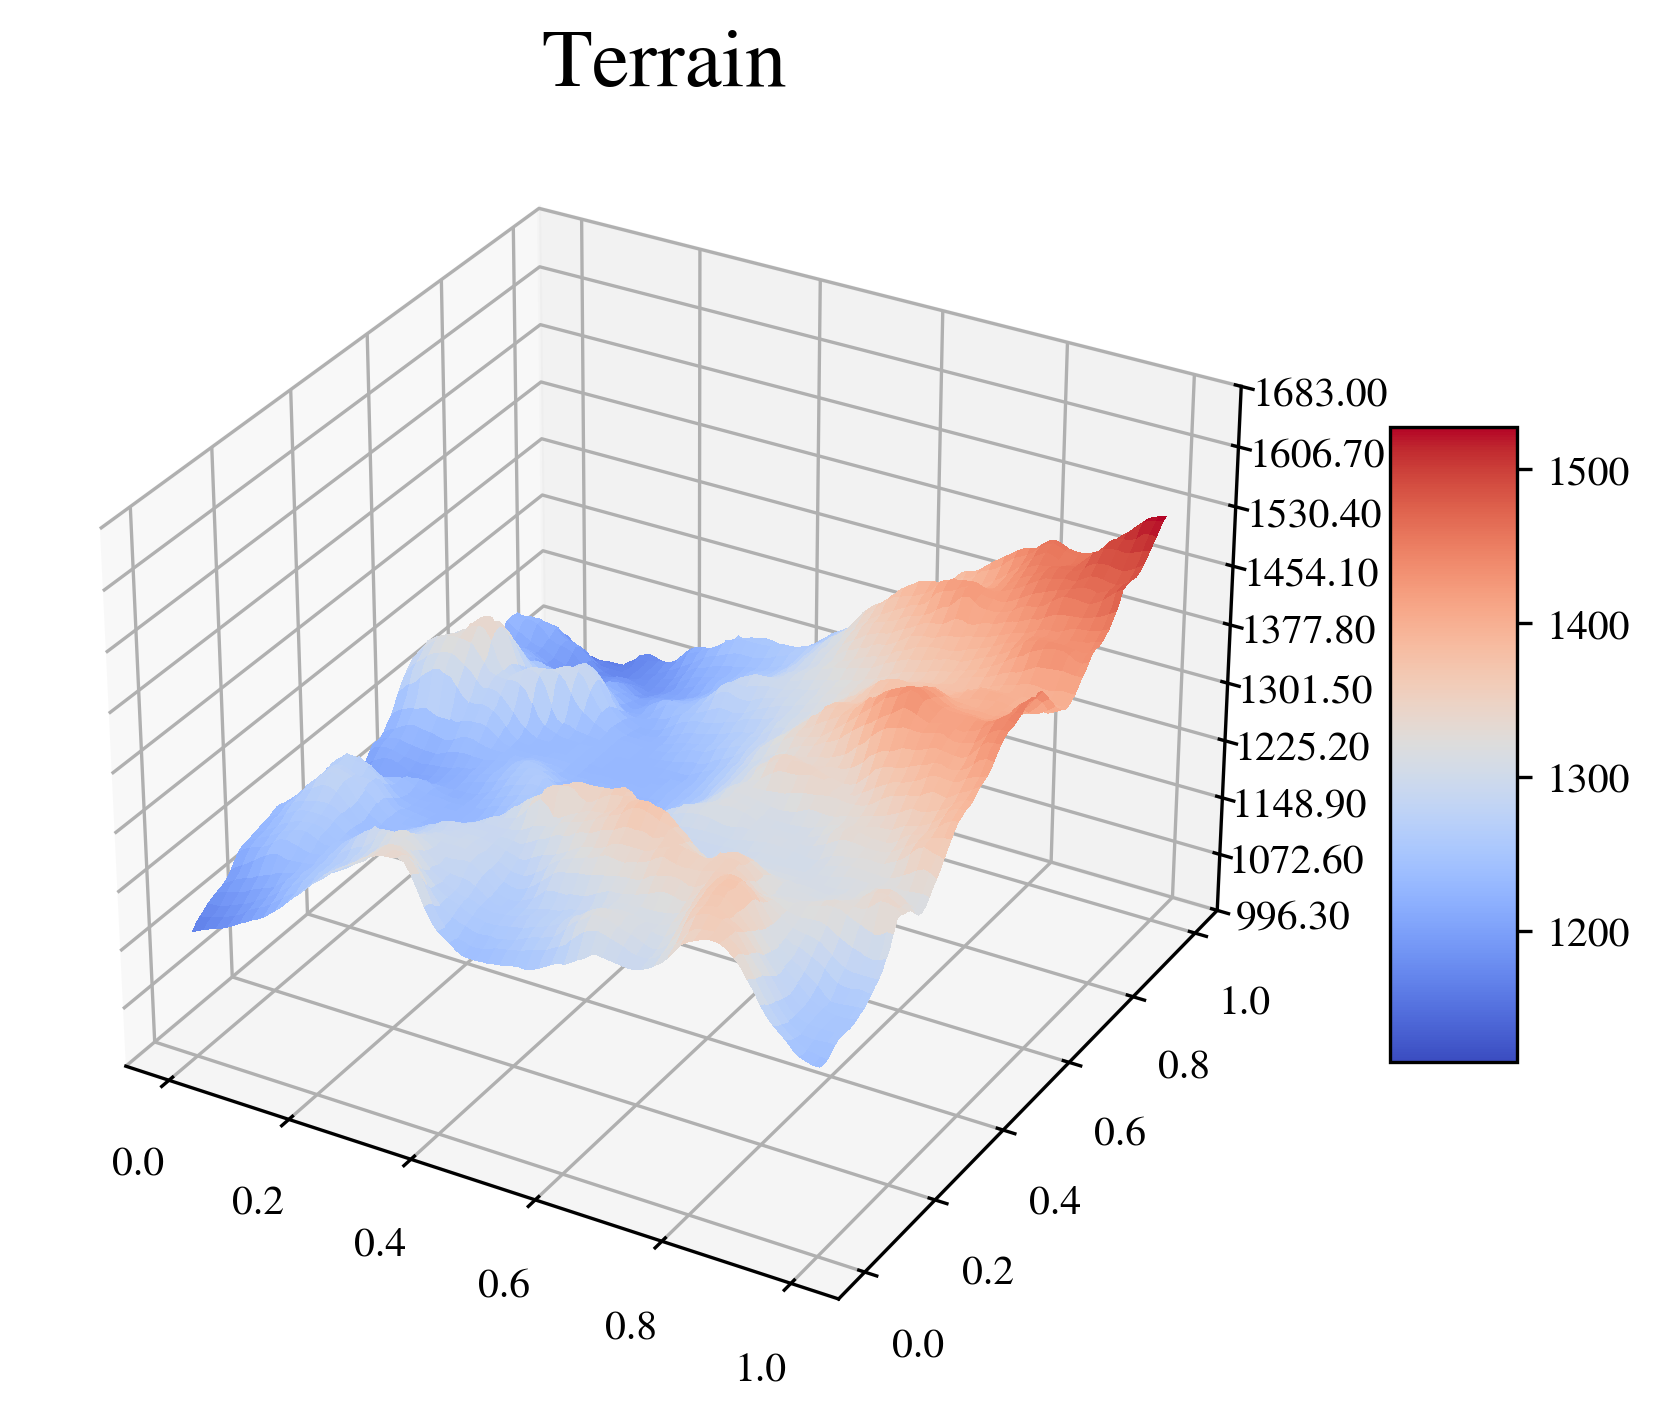

In [5]:
data = TerrainDataGen(data_points = data_points_terrain)
data.plot_data(save_path="../figures/figures_in_report/terrain_41.pdf")

### Franke function

In [6]:
plots = Plotting(data_points=data_points, data="Franke_Noise", seed=12)

In [8]:
#loading paramters fiund from grid search

with open('best_params.json', 'r') as f: 
    best_params = json.load(f)

best_lambda_lasso = best_params["best_params_lasso_franke"]["best_lambda"]
best_deg_lasso = best_params["best_params_lasso_franke"]["best_degree"]

best_lambda_ridge = best_params["best_params_ridge_franke"]["best_lambda"]
best_deg_ridge = best_params["best_params_ridge_franke"]["best_degree"]

best_lambda_lasso_terrain = best_params["best_params_lasso_terrain"]["best_lambda"]
best_deg_lasso_terrain = best_params["best_params_lasso_terrain"]["best_degree"]

best_lambda_ridge_terrain = best_params["best_params_ridge_terrain"]["best_lambda"]
best_deg_ridge_terrain = best_params["best_params_ridge_terrain"]["best_degree"]

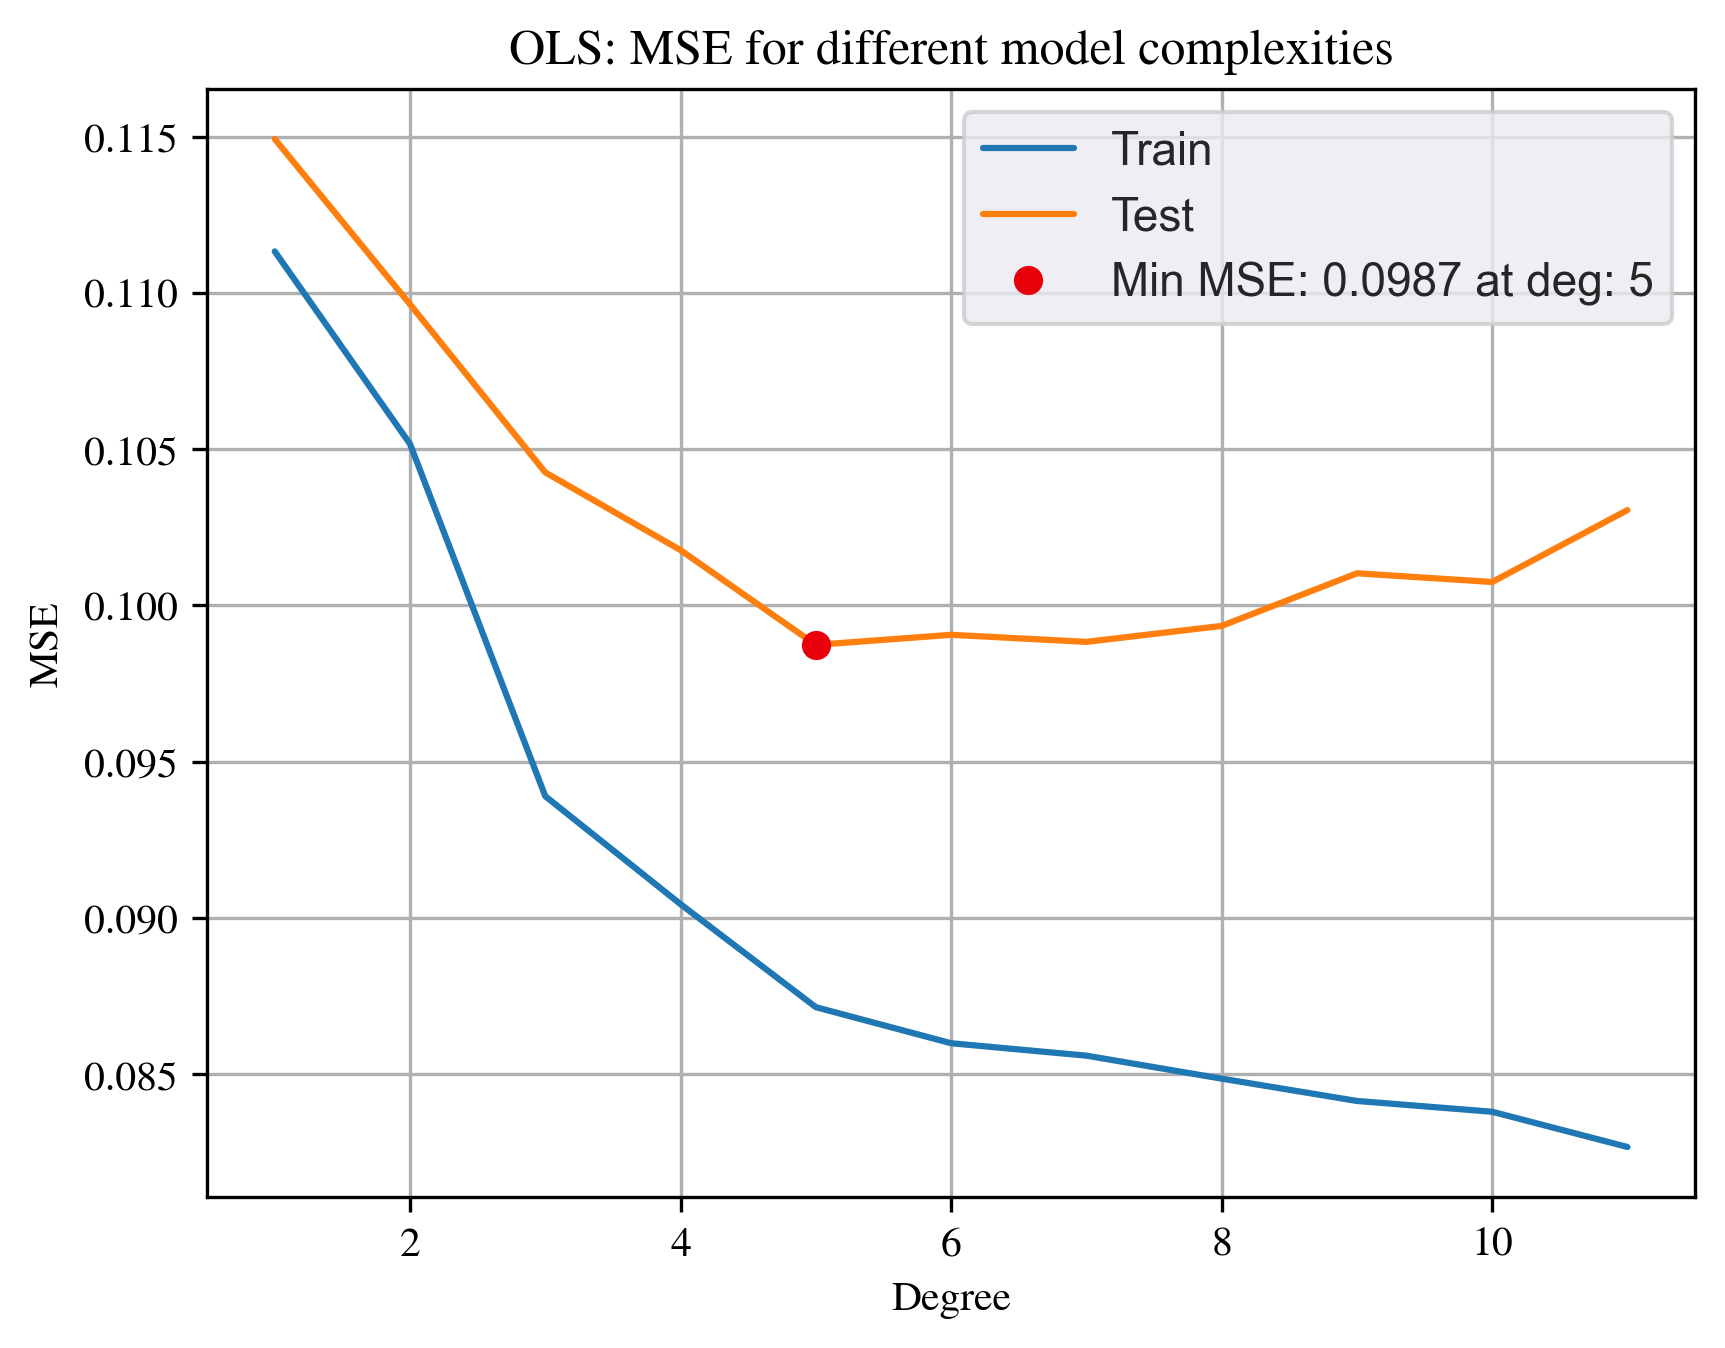

In [9]:
plots.plot_MSE_R2(y_axis="MSE", max_deg=11)
plt.savefig("../figures/figures_in_report/OLS_MSE_Franke_Noise.pdf") 

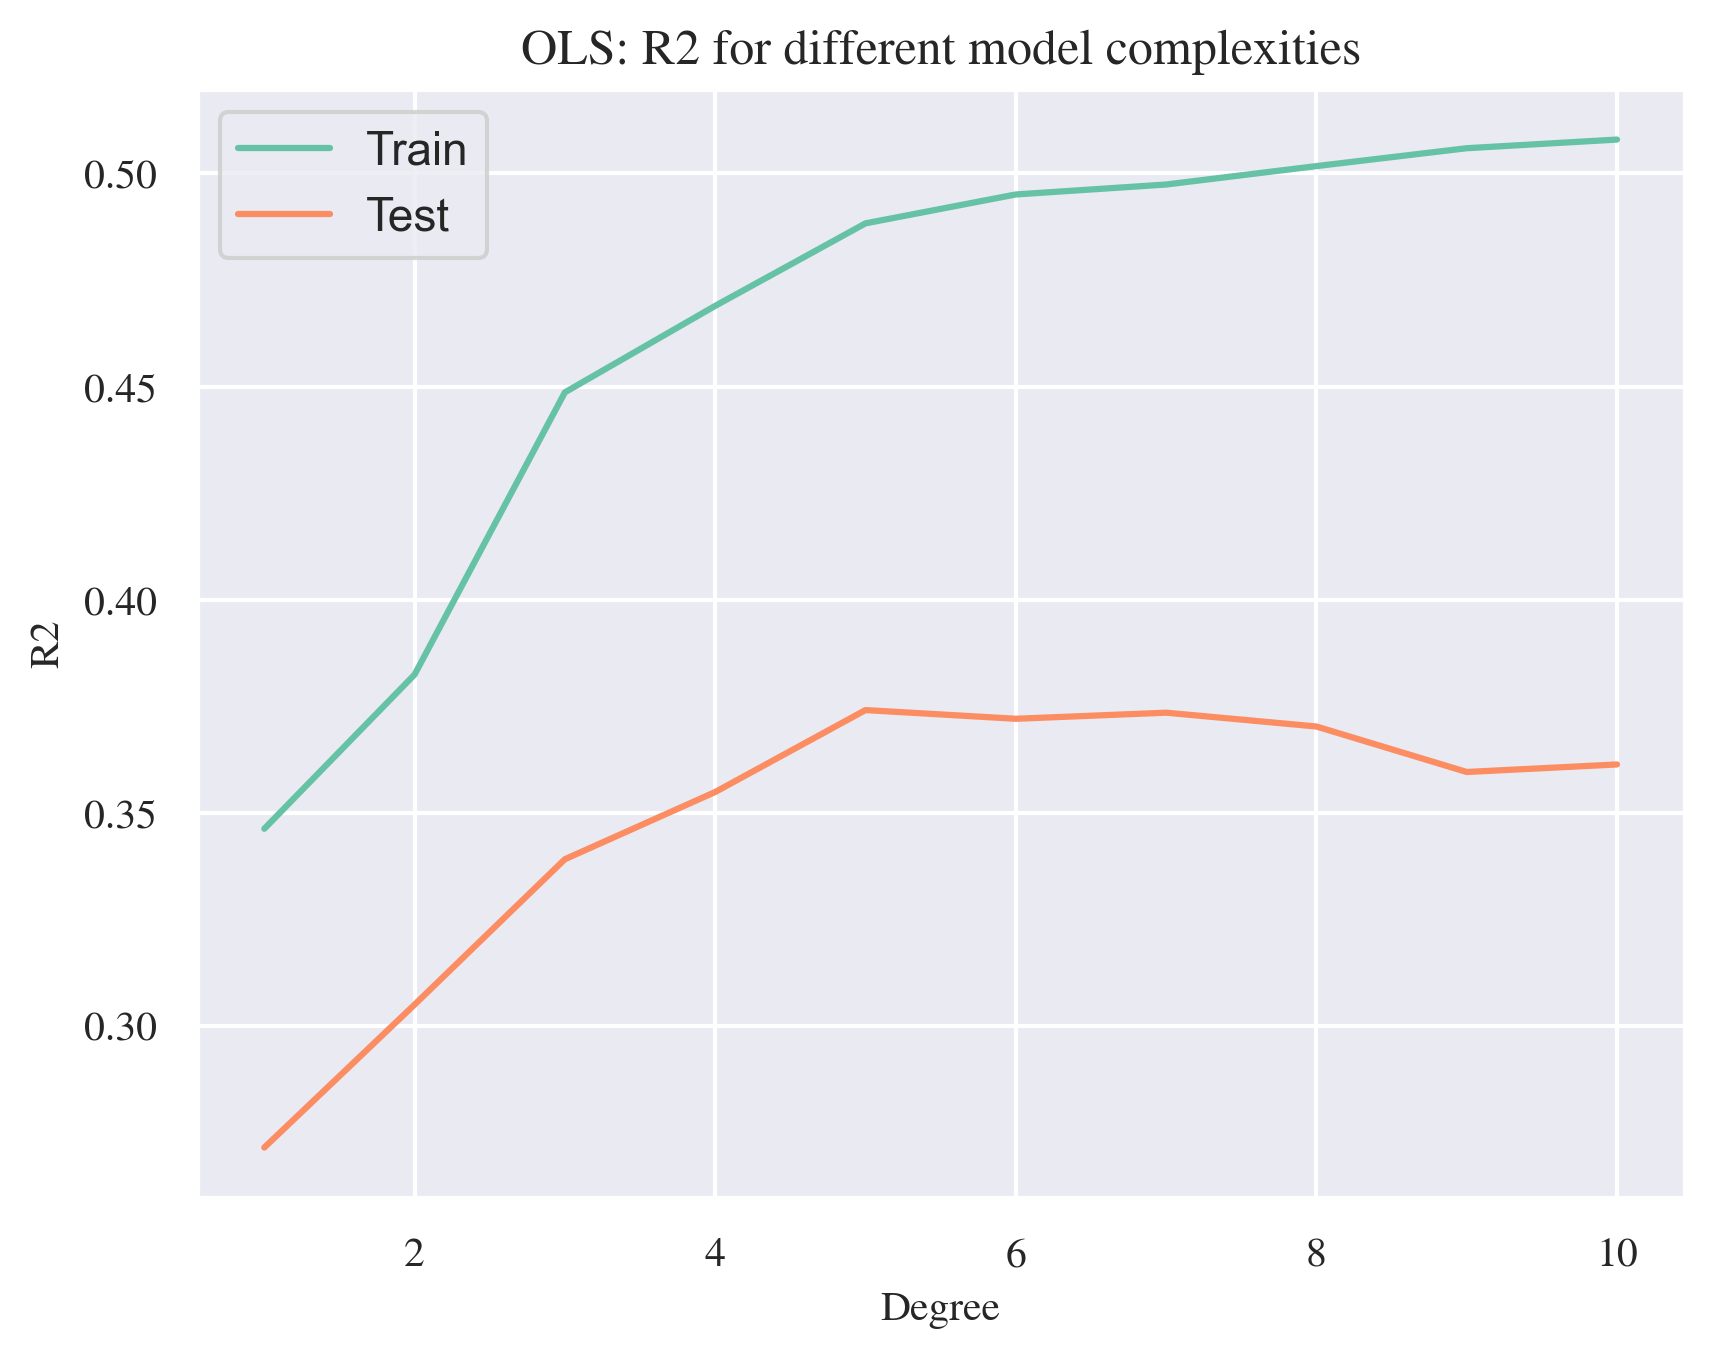

In [10]:
plots.plot_MSE_R2(y_axis="R2")
plt.savefig("../figures/figures_in_report/OLS_R2_Franke_Noise.pdf")

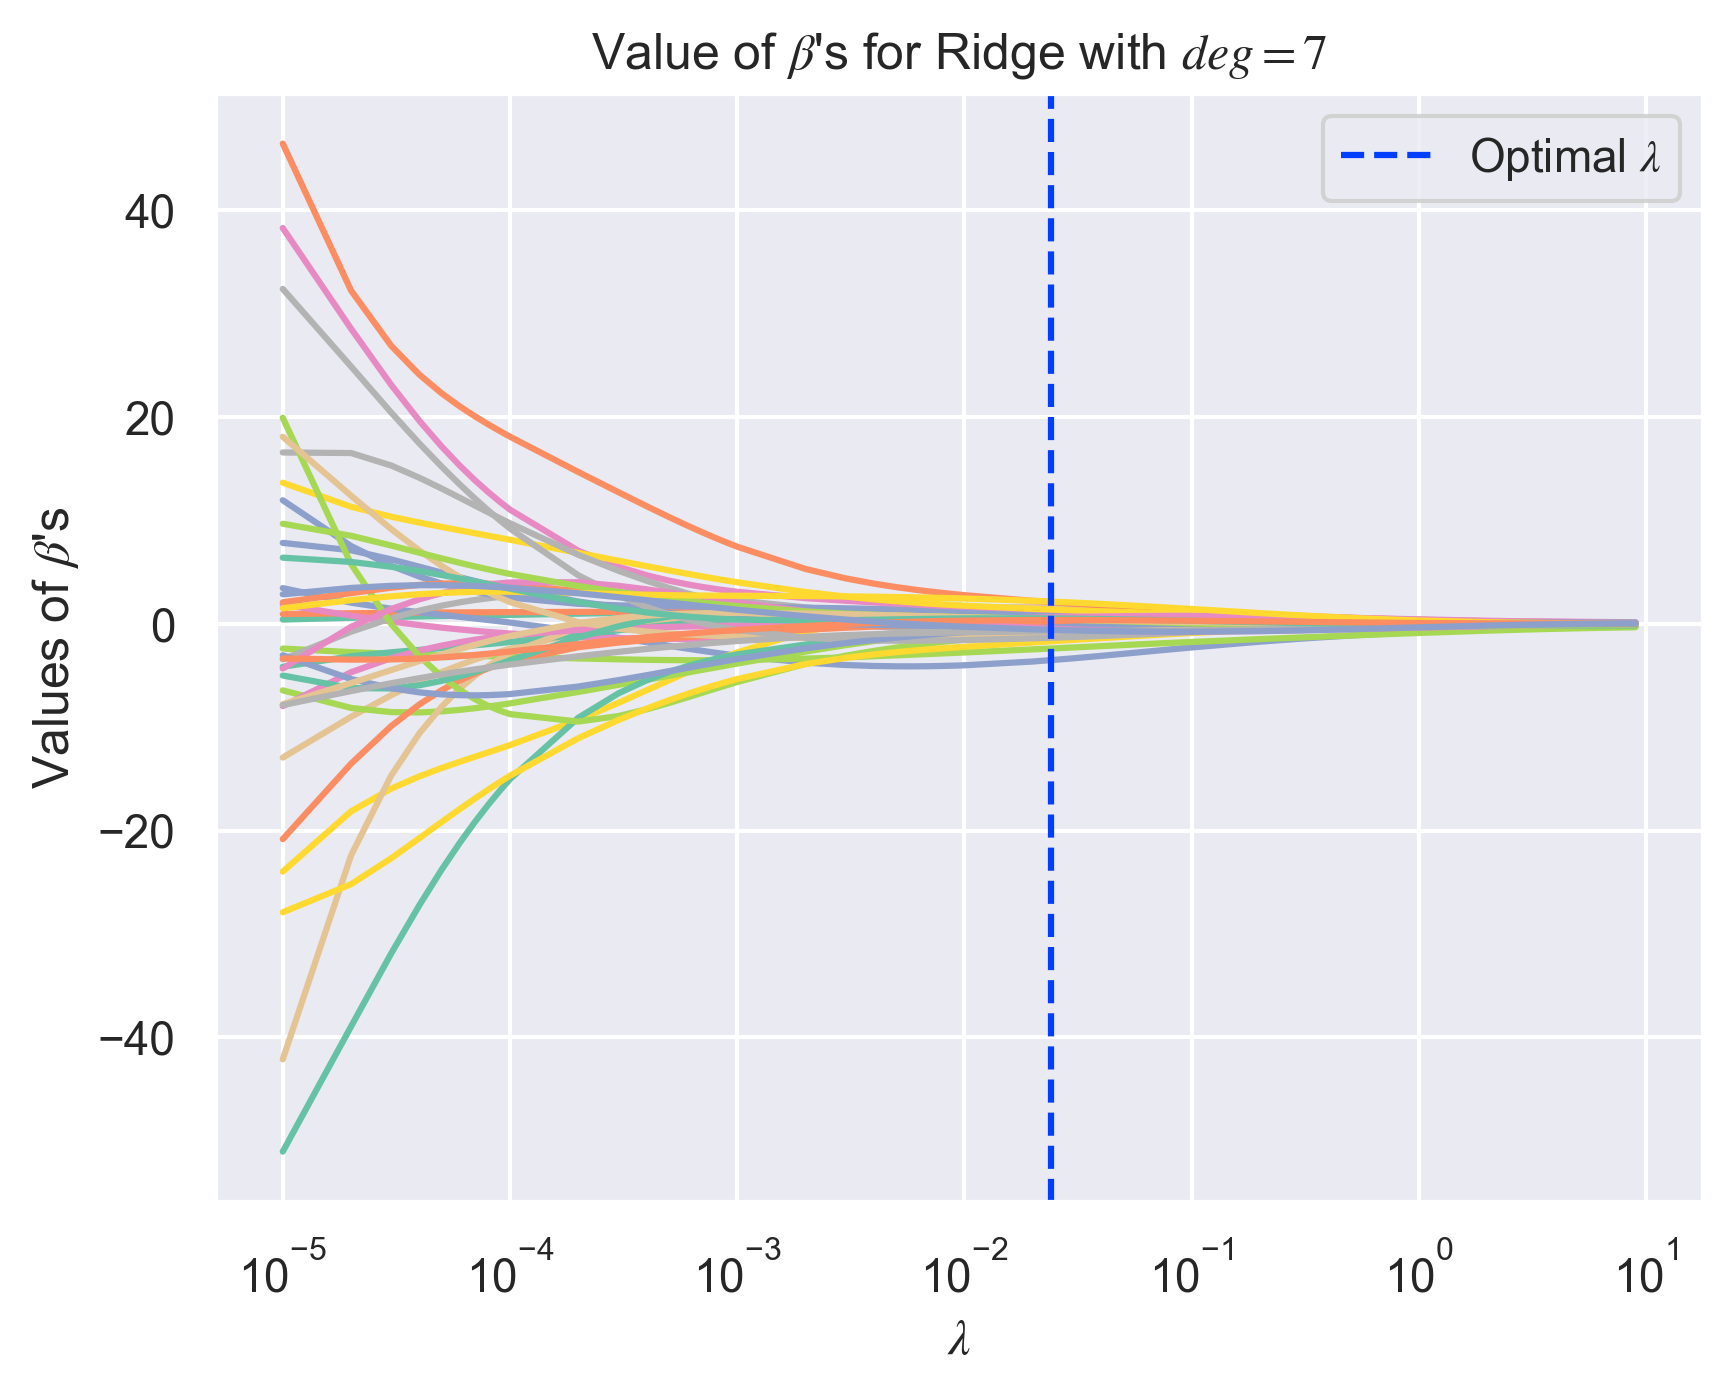

In [11]:
plots.plot_betas_lambda("Ridge", deg=best_deg_ridge, opt_lambda=best_lambda_ridge)
plt.savefig("../figures/figures_in_report/Ridge_Betas_lambda_Franke_Noise_const_deg.pdf")

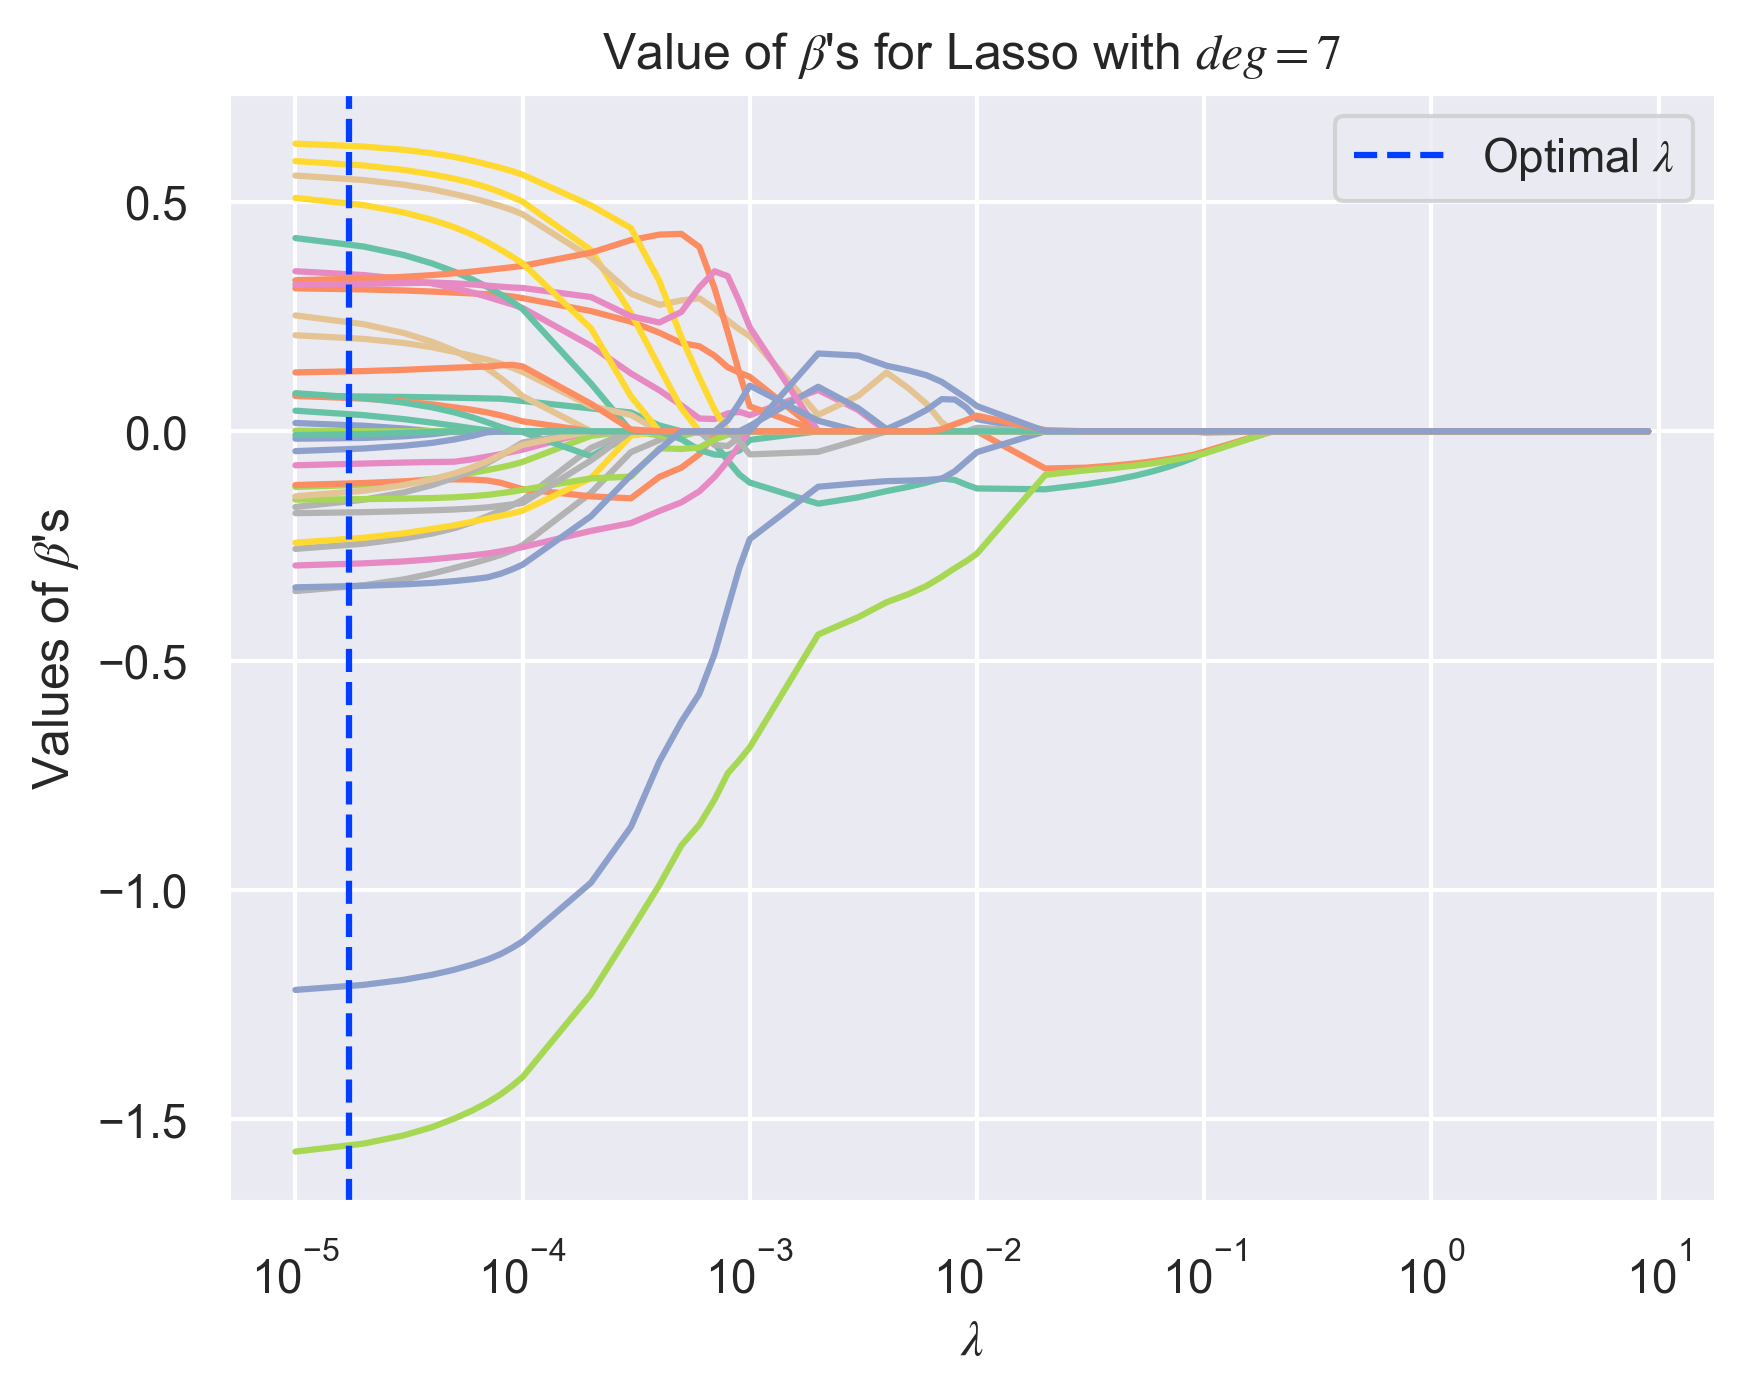

In [12]:
plots.plot_betas_lambda("Lasso", deg=best_deg_lasso, opt_lambda=best_lambda_lasso)
plt.savefig("../figures/figures_in_report/lasso_Betas_lambda_Franke_Noise_const_deg.pdf")

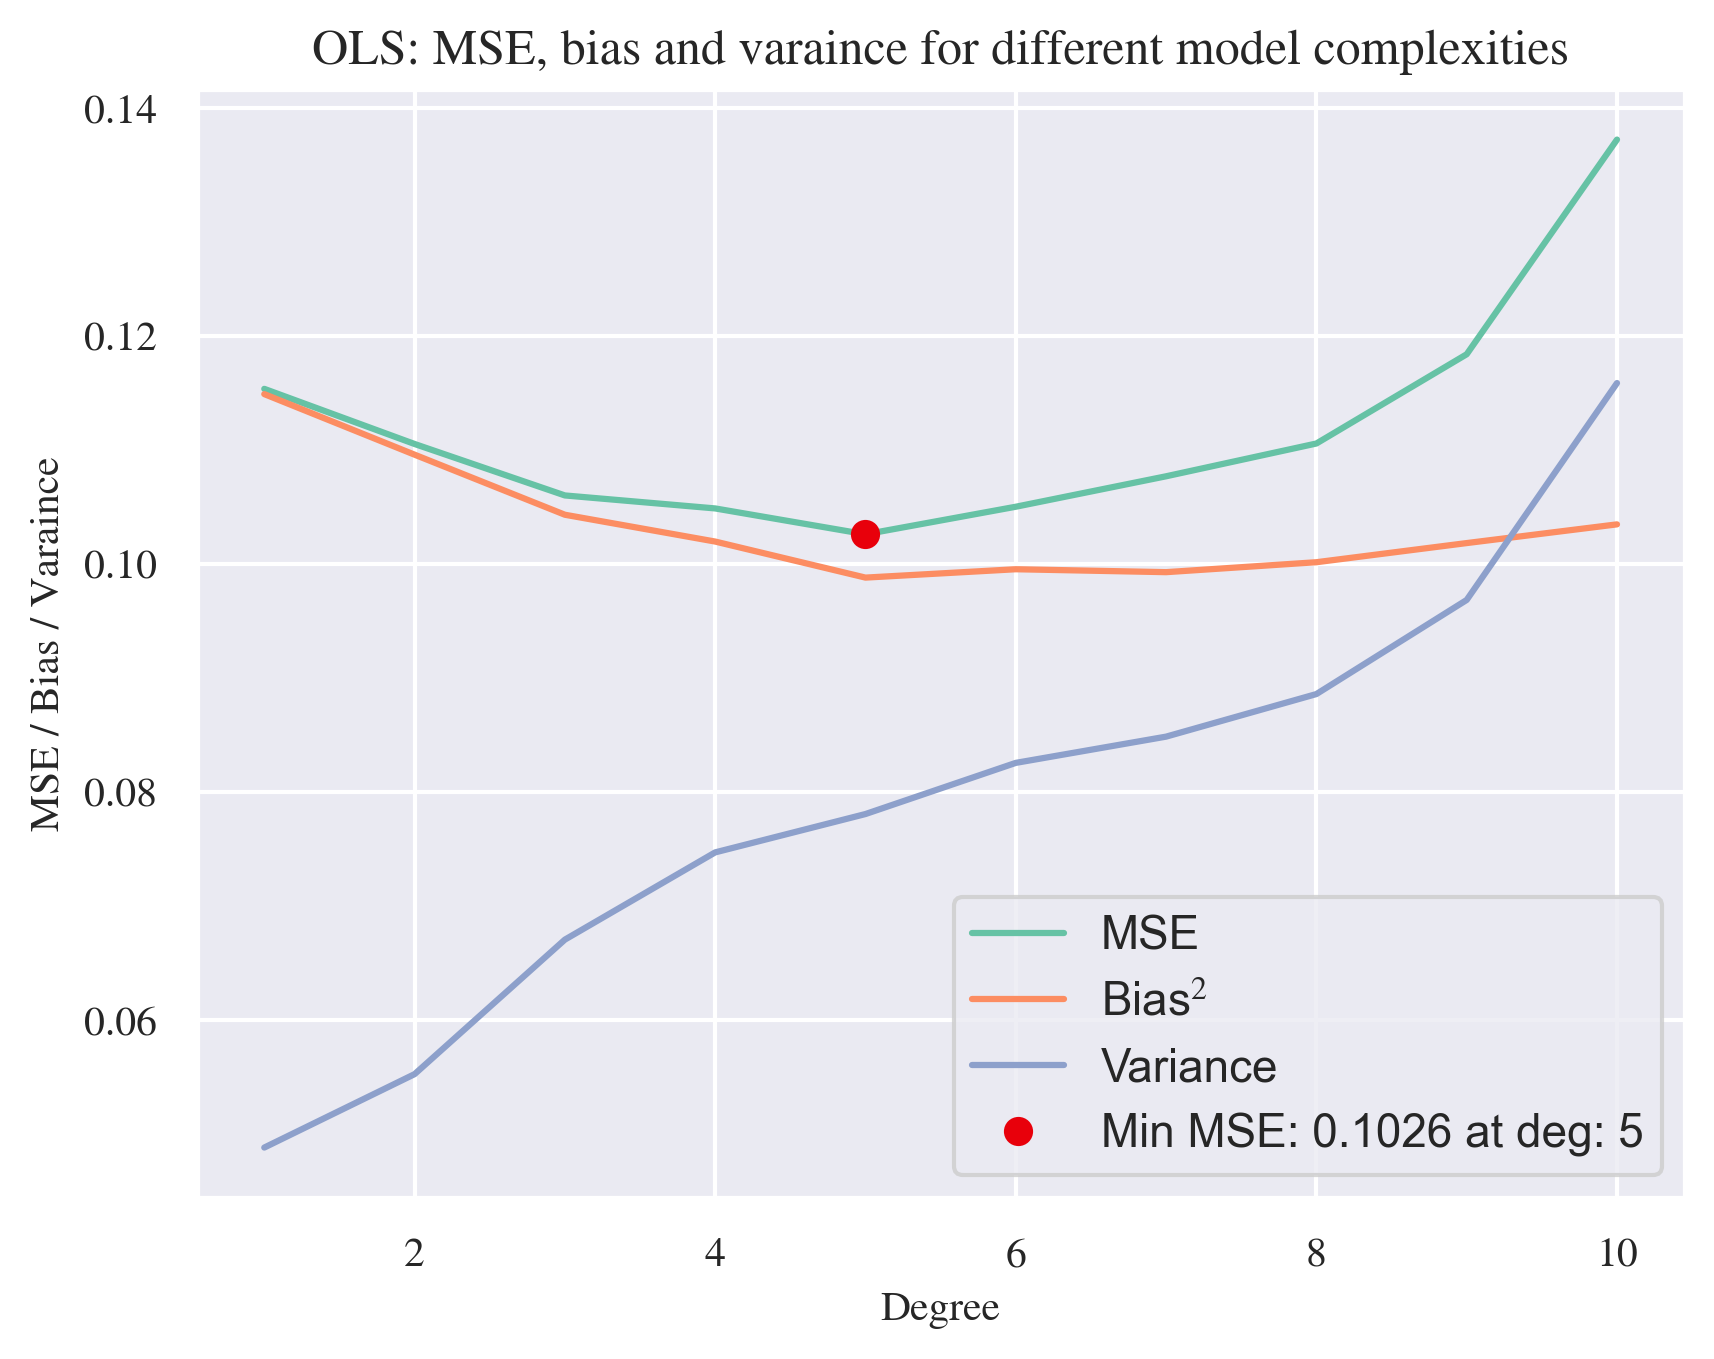

In [13]:
plots.plot_bootstrap_bias_var(max_deg=10)
plt.savefig("../figures/figures_in_report/bias_var_Franke_Noise_bootstrap.pdf")

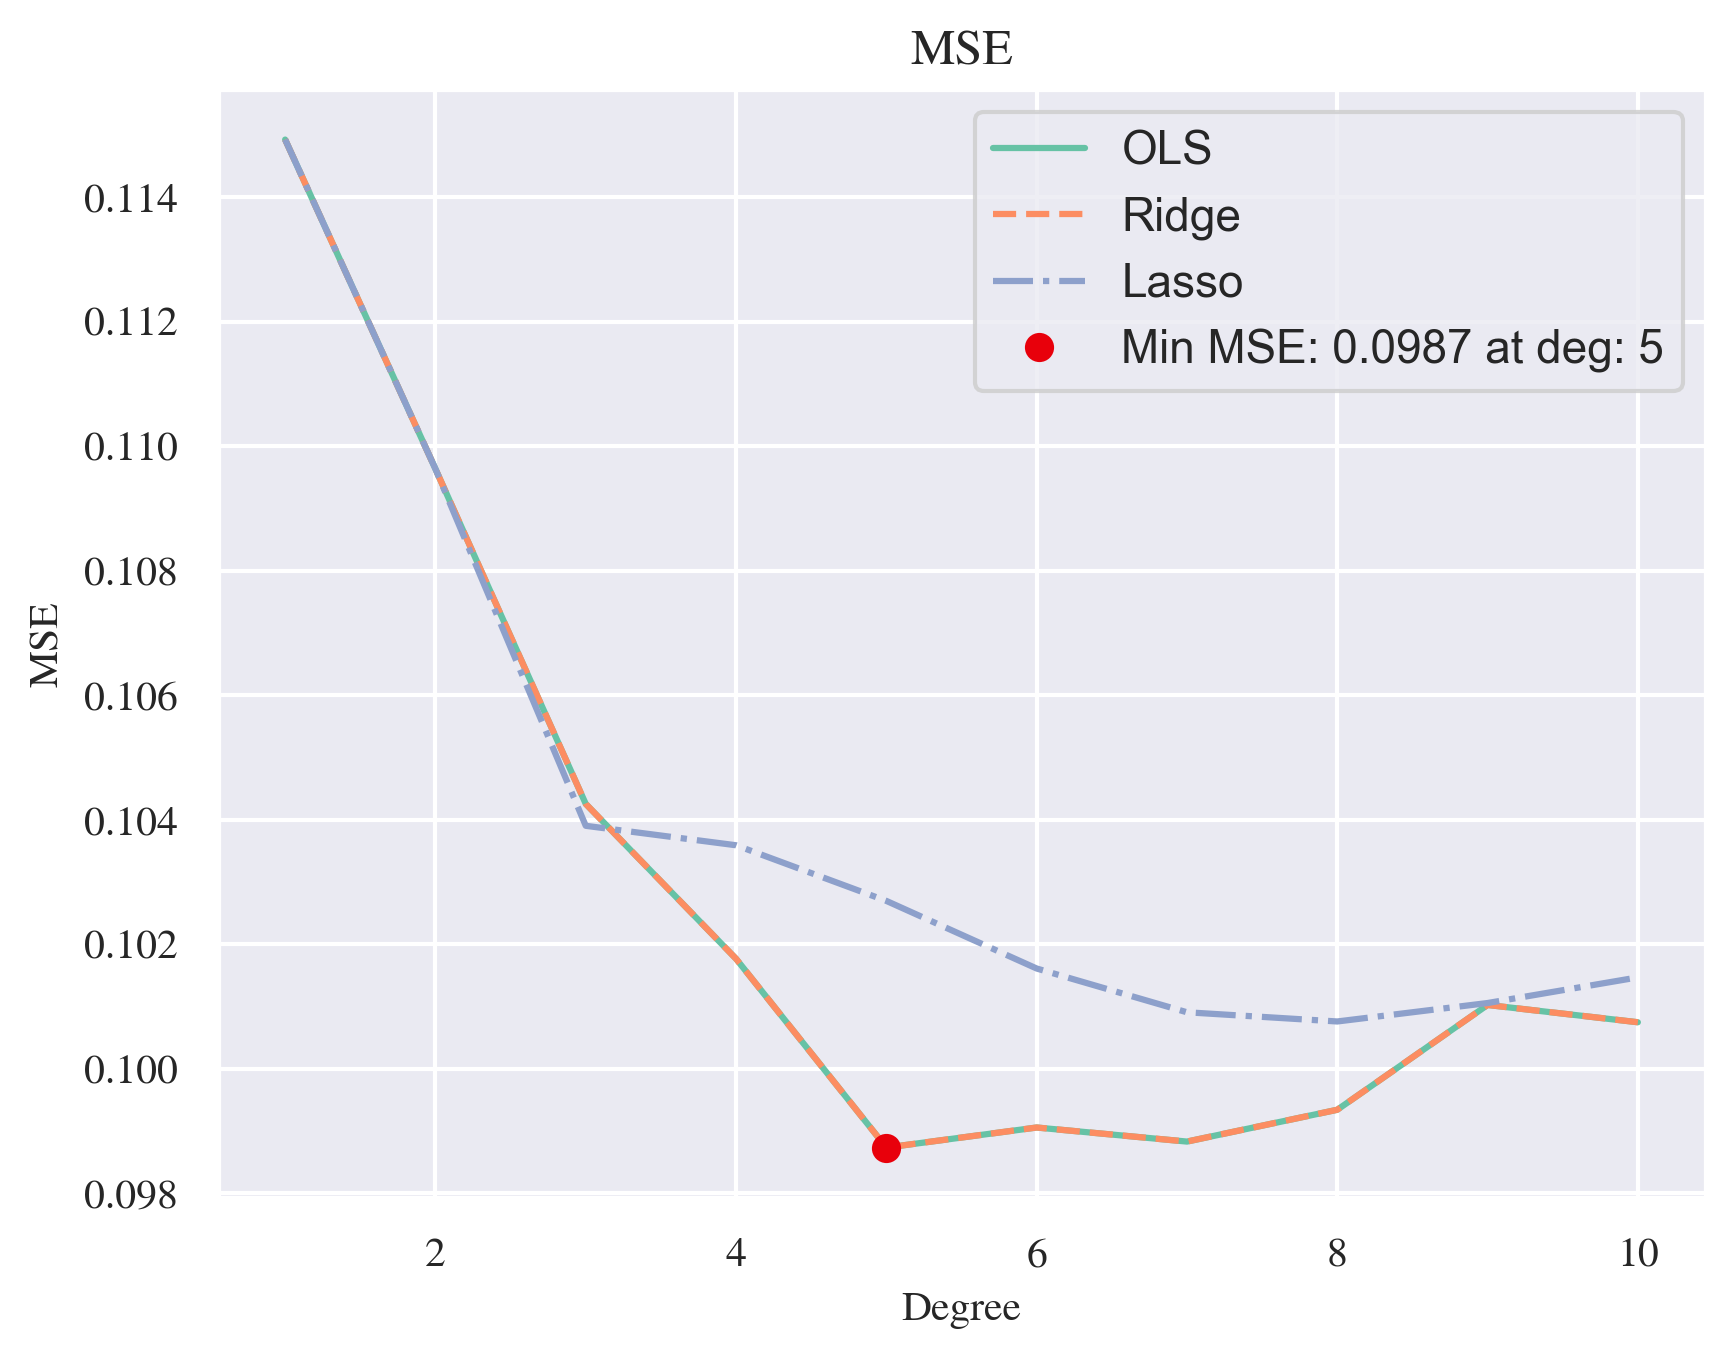

In [15]:
plots.plot_all_no_resampling(max_degree=10)
plt.savefig("../figures/figures_in_report/OLS_Ridge_Lasso_Franke_Noise.pdf")

### Terrain data

In [ ]:
plots_terrain = Plotting(data_points=data_points_terrain, data="Terrain", seed=12)
max_degree_terrain = 11
n_sample_terrain = 100
k_folds_terrain = 10

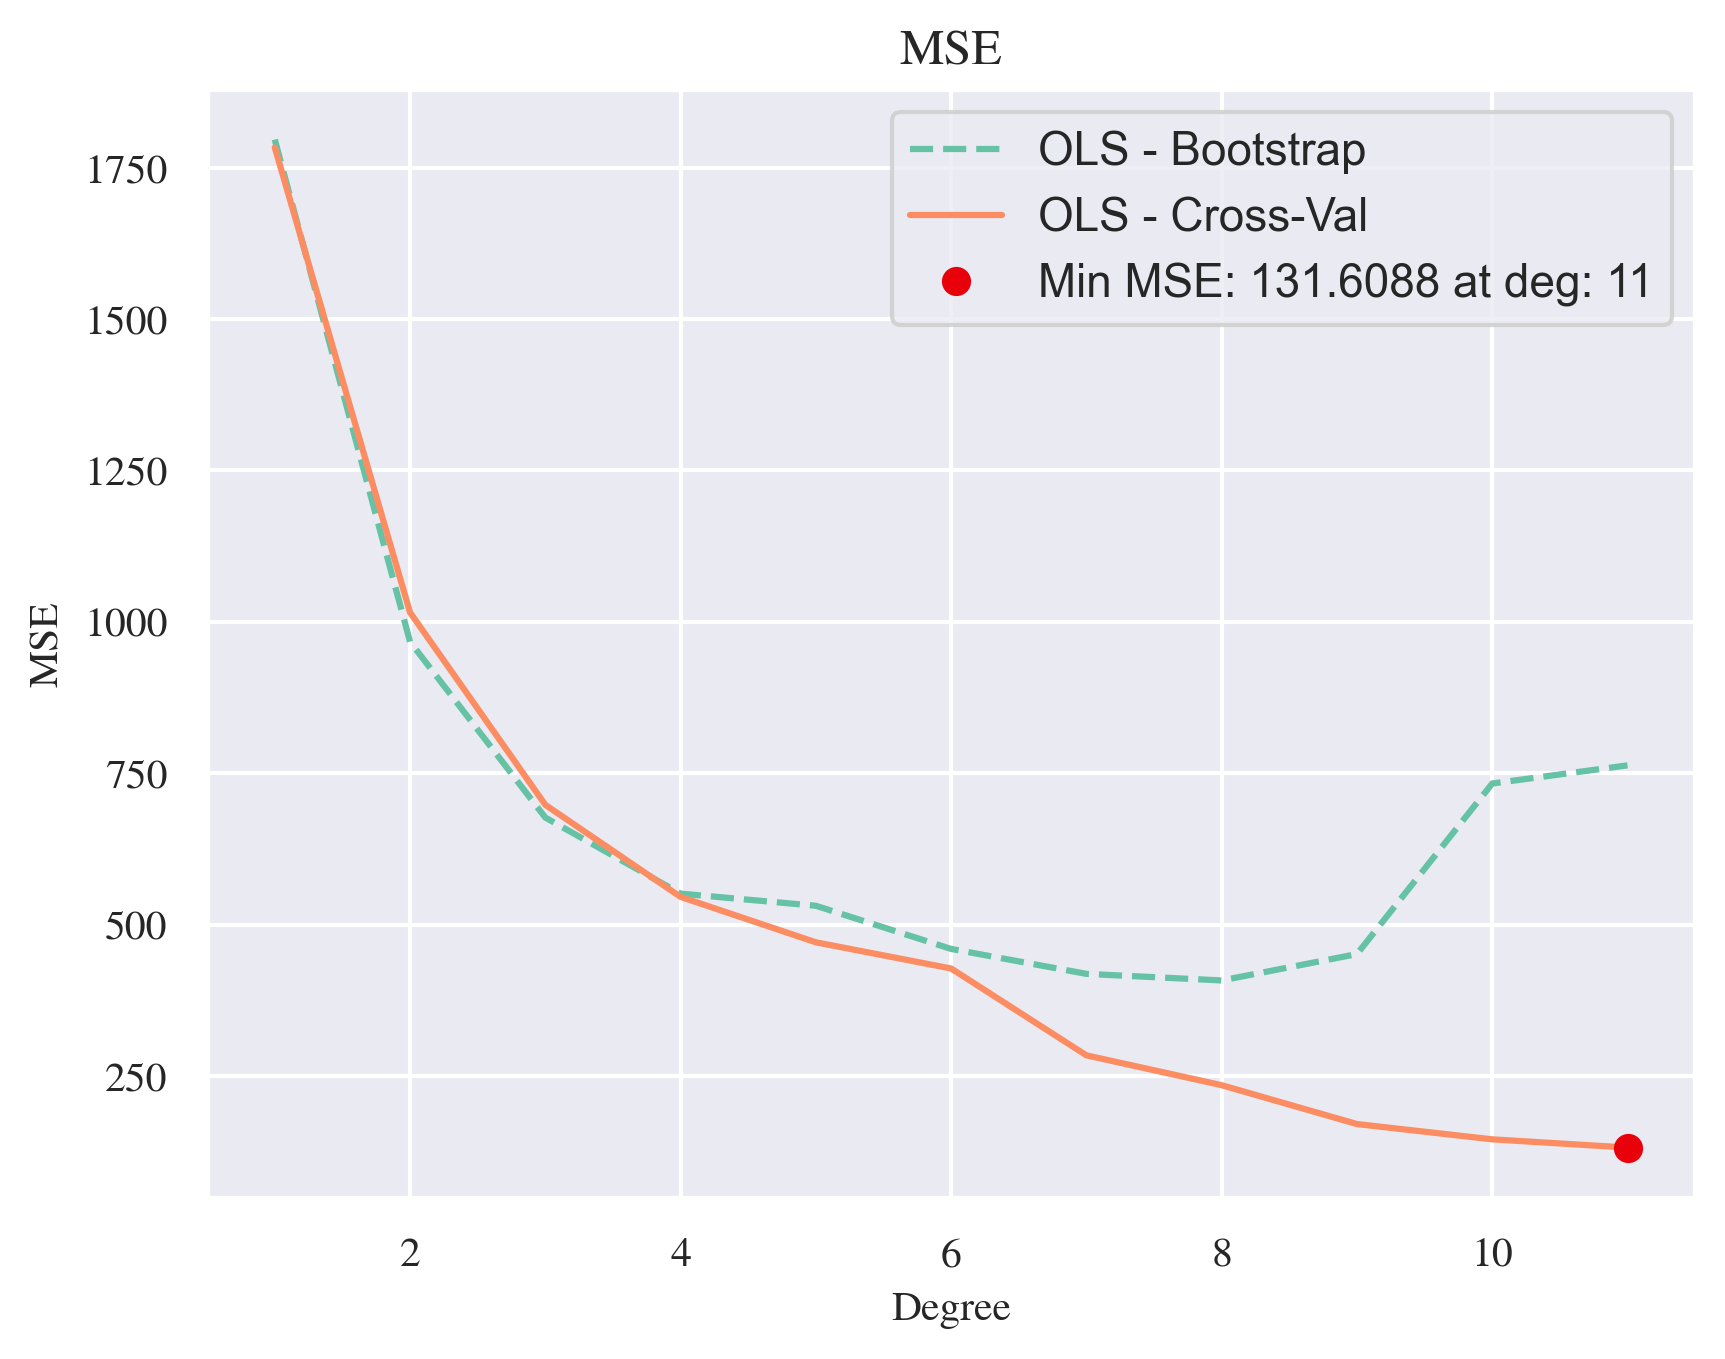

In [ ]:
plots_terrain.plot_cv_bs_ols(max_degree=max_degree_terrain, n_samples=n_sample_terrain, k_folds=k_folds_terrain)
plt.savefig("../figures/figures_in_report/CV_BS_OLS_terrain.pdf")

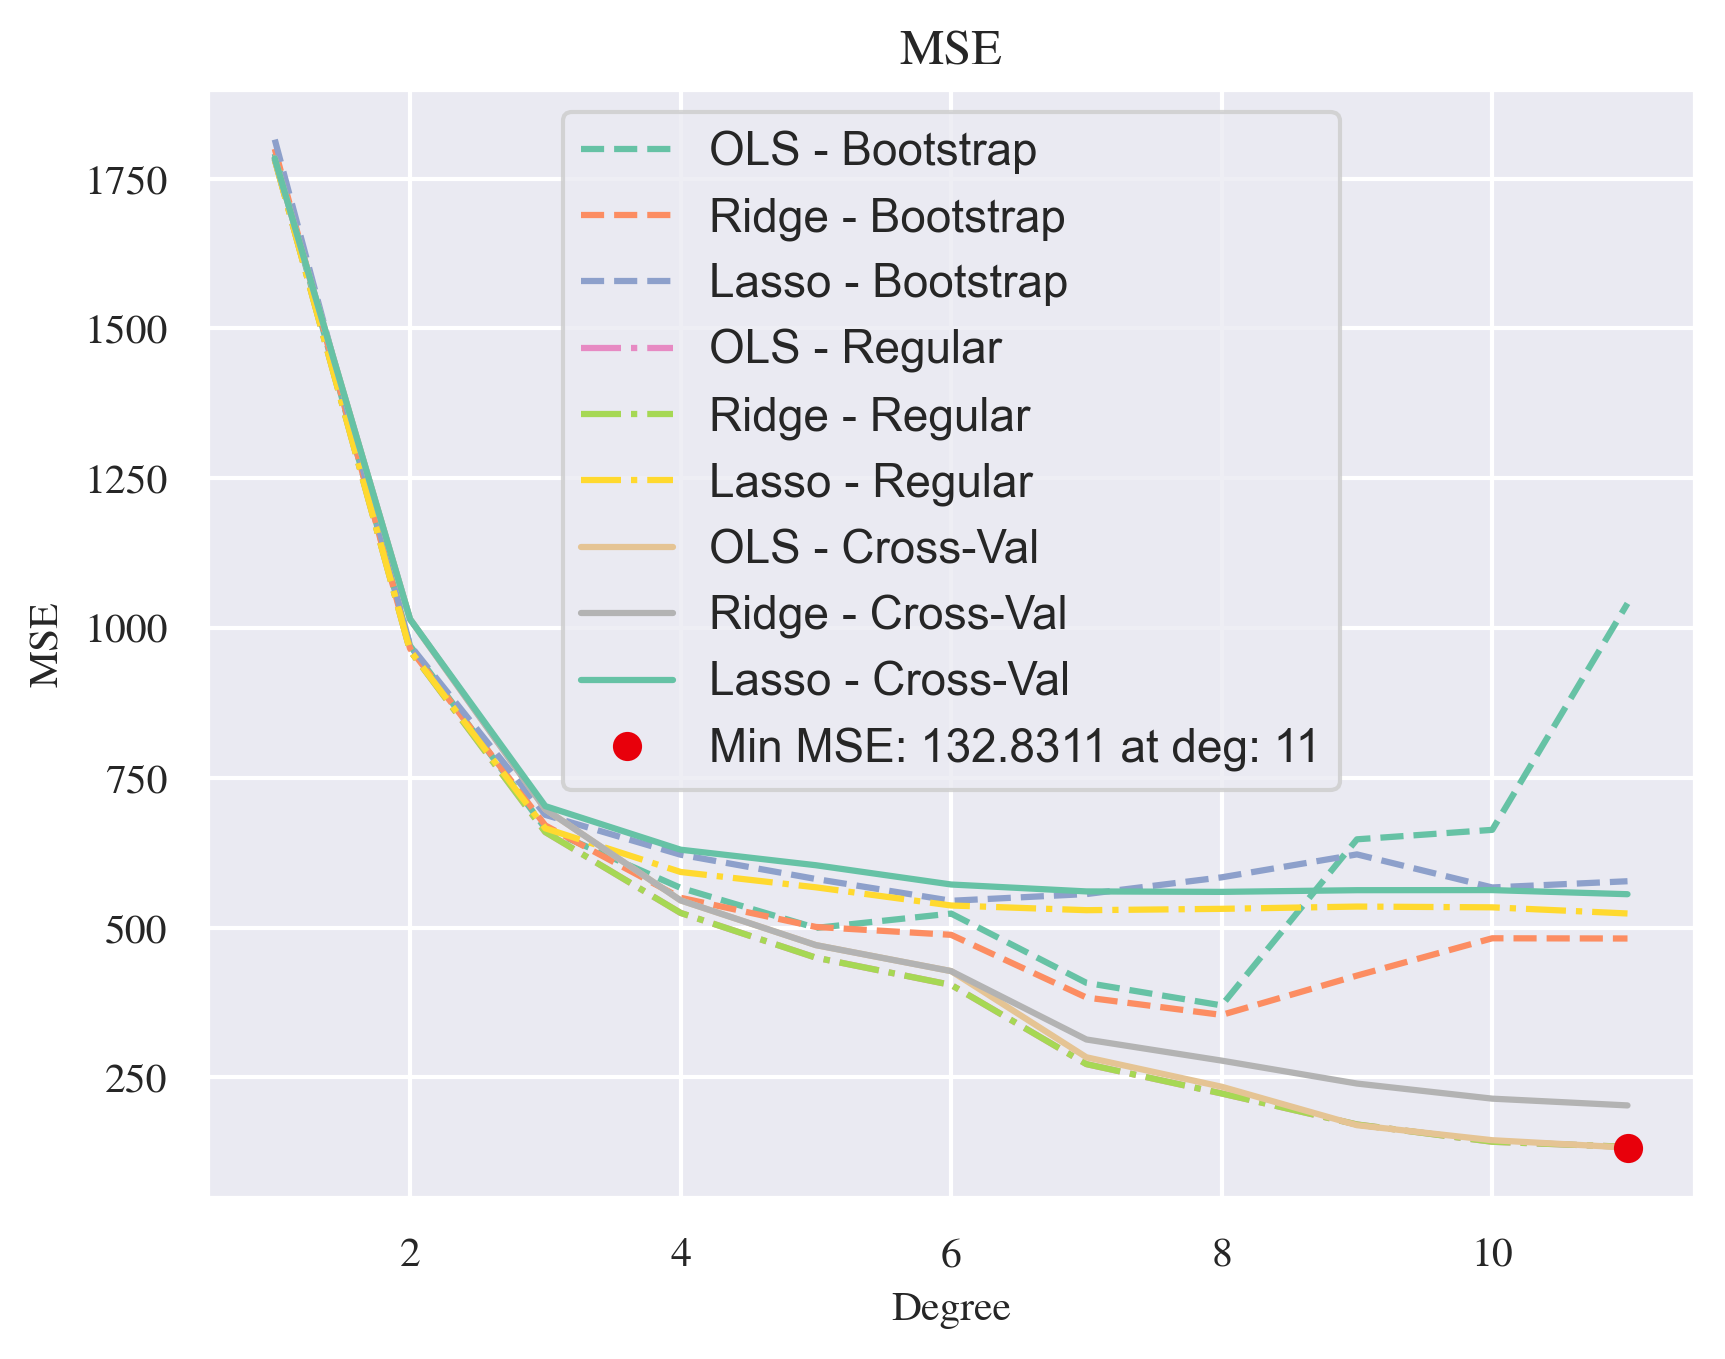

In [ ]:
plots_terrain.plot_all(ridge_lambda=best_lambda_ridge_terrain, lasso_lambda=best_lambda_lasso_terrain, max_degree=max_degree_terrain, n_samples=n_sample_terrain, k_folds=k_folds_terrain)
plt.savefig("../figures/figures_in_report/All_terrain.pdf")